# Hyperparameter Tuning with GridSearchCV

## 1. Import Dependencies

In [70]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

warnings.filterwarnings('ignore')

## 2. Load Processed Data

In [71]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

print("Data loaded successfully from artifacts.")

Data loaded successfully from artifacts.


## 3. Model Training

In [72]:
model_lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)
model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
# Y_hat = Y_hat_prova > 0.5

In [74]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

pd.Series(Y_test).value_counts()


0    1623
1     376
Name: count, dtype: int64

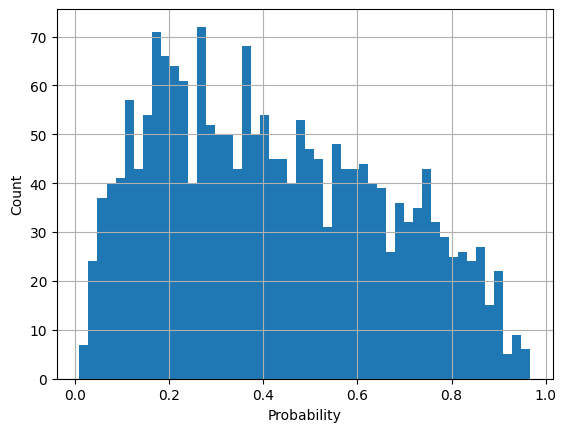

In [75]:
Y_lr_test = Y_proba_test[:,1]
plt.hist(Y_lr_test,bins=50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid()
plt.title('')
plt.show()

In [76]:
Y_hat_test = (Y_proba_test[:, 1] > 0.65).astype(int)  # ✅ CORRECT
Y_hat_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1999,))

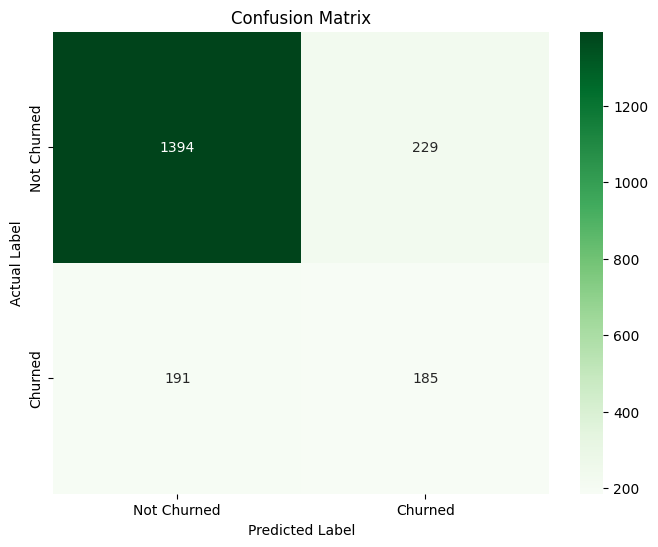

In [77]:
cm = confusion_matrix(Y_test, Y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()